# **Projet Evaluation PRO-BTP - 1**

## Ce projet consiste à réaliser les tâches sur le jeu de données Open data de la SNCF téléchargeable à l'adresse suivante :

https://data.iledefrance-mobilites.fr/explore/dataset/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-sem/table/


### Dans ce notebook, nous allons : 

1. Présenter les 20 prémières stations en terme de validation et faire une illustration de ce classement.
2. Montrer Quelles prédictions nous pouvez faire pour le nombre de validations dans les stations "OLYMPIADES" et "M. MONTROUGE" sur la plage du 24 au 30 juin

#### 1.1 - Import librairies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.2 - Import dataset

In [2]:
# Import dataset
data = pd.read_csv('../input/data-validation/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-sem.csv', sep = ";")

data.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2019-04-17,800,852,657,PLAISIR-GRIGNON,64199.0,AUTRE TITRE,5
1,2019-04-17,800,852,658,PLAISIR-LES-CLAYES,64195.0,NAVIGO,953
2,2019-04-17,800,852,720,RAMBOUILLET,60665.0,?,111
3,2019-04-17,800,852,720,RAMBOUILLET,60665.0,IMAGINE R,1552
4,2019-04-17,800,852,797,SEVRES RIVE GAUCHE,69531.0,NAVIGO,1145


In [3]:
# Data size
data.shape

(940549, 8)

In [4]:
# type of columns of dataset
data.columns

Index(['JOUR', 'CODE_STIF_TRNS', 'CODE_STIF_RES', 'CODE_STIF_ARRET',
       'LIBELLE_ARRET', 'ID_REFA_LDA', 'CATEGORIE_TITRE', 'NB_VALD'],
      dtype='object')

In [5]:
# Vérification des données manquantes

print('Number of missing data in each column:')
print(data.isnull().sum(axis = 0))

Number of missing data in each column:
JOUR                   0
CODE_STIF_TRNS         0
CODE_STIF_RES          0
CODE_STIF_ARRET        0
LIBELLE_ARRET          0
ID_REFA_LDA        12205
CATEGORIE_TITRE        0
NB_VALD                0
dtype: int64


In [6]:
# Suppression des données manquantes 

data.dropna(axis = 0, inplace = True)

In [7]:
# types of columns

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928344 entries, 0 to 940548
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   JOUR             928344 non-null  object 
 1   CODE_STIF_TRNS   928344 non-null  int64  
 2   CODE_STIF_RES    928344 non-null  object 
 3   CODE_STIF_ARRET  928344 non-null  object 
 4   LIBELLE_ARRET    928344 non-null  object 
 5   ID_REFA_LDA      928344 non-null  float64
 6   CATEGORIE_TITRE  928344 non-null  object 
 7   NB_VALD          928344 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 63.7+ MB


Le **JOUR** est de type *object*, nous allons le transformer en *datetime*

In [8]:
#Mettre Le jour est de type datetime
data['JOUR'] = pd.to_datetime(data['JOUR'])  


Dans la colonne **NB_VALD**, il y a des valeurs telles que Moins de 5, j'ai choisi de le remplacer avec 4 puis changé le type en *int*

In [9]:
data['NB_VALD'].replace(['Moins de 5'], '4', inplace=True)
data['NB_VALD'] = data['NB_VALD'].astype(int)

In [10]:
data

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2019-04-17,800,852,657,PLAISIR-GRIGNON,64199.0,AUTRE TITRE,5
1,2019-04-17,800,852,658,PLAISIR-LES-CLAYES,64195.0,NAVIGO,953
2,2019-04-17,800,852,720,RAMBOUILLET,60665.0,?,111
3,2019-04-17,800,852,720,RAMBOUILLET,60665.0,IMAGINE R,1552
4,2019-04-17,800,852,797,SEVRES RIVE GAUCHE,69531.0,NAVIGO,1145
...,...,...,...,...,...,...,...,...
940544,2019-06-30,810,802,839,SAINT-REMY-LES-CHEVREUSE,62978.0,FGT,20
940545,2019-06-30,810,802,889,VERT-GALANT,73482.0,AMETHYSTE,125
940546,2019-06-30,810,802,889,VERT-GALANT,73482.0,TST,380
940547,2019-06-30,810,802,904,VILLEPARISIS-MITRY-LE-NEUF,68916.0,IMAGINE R,396


In [11]:
# Remplacer le titre "?", par le "Titre inconnu"
data['CATEGORIE_TITRE'].replace(['?'], 'TITRE INCONNU', inplace=True)

le jeu de données data est donc prêt pour les différentes tâches 

#### 1.3 - Les 20 premières stations en terme de validation

In [12]:
## On regroupe les stations en terme de validation dans un dataset 

libelle_count = data['LIBELLE_ARRET'].value_counts().to_frame().reset_index().rename(columns={'index':'LIBELLE_ARRET','LIBELLE_ARRET':'count'})

In [13]:
## Sélection des 20 premières stations en termes de validations 

all_libelle_count = libelle_count[:20] 

In [14]:
## Le classement de ces 20 premières stations 

all_libelle_count['LIBELLE_ARRET']

0                         GARE DE LYON
1              LA DEFENSE-GRANDE ARCHE
2             CHARLES DE GAULLE ETOILE
3                    DENFERT-ROCHEREAU
4                         MONTPARNASSE
5                         GARE DU NORD
6                               NATION
7                        GARE DE L'EST
8                           AUSTERLITZ
9              SAINT-MICHEL NOTRE DAME
10    BIBLIOTHEQUE FRANCOIS MITTERRAND
11                           INVALIDES
12                       PORTE MAILLOT
13                               JAVEL
14                     MASSY-PALAISEAU
15                   PEREIRE-LEVALLOIS
16                 NANTERRE-UNIVERSITE
17                               BERCY
18                     MASSY-VERRIERES
19                       SAINT-FARGEAU
Name: LIBELLE_ARRET, dtype: object

#### 1.4- La répresentation graphique de ces stations 

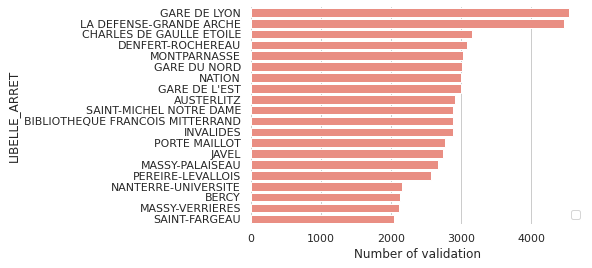

In [15]:
#On fait l'illustration des 20 premières stations en terme de validation
#Avec la librairie seaborn

sns.set(style="whitegrid")

ay = sns.barplot(x="count", y="LIBELLE_ARRET", data=all_libelle_count, color="salmon")

# Add a legend and informative axis label
ay.legend(ncol=2, loc="lower right", frameon=True)
ay.set(ylabel="LIBELLE_ARRET",xlabel="Number of validation")
sns.despine(left=True, bottom=True)

## 2 -  Montrer Quelles prédictions nous pouvez faire pour le nombre de validations dans les stations "OLYMPIADES" et "M. MONTROUGE" sur la plage du 24 au 30 juin

In [16]:
## On regroupe le nombre de valisations dans les stations "OLYMPIADES" et "M.MONTROUGE" entre le 24 et 30 juin dans un dataset

df_station = data.loc[(data['JOUR'] >= '2019-06-24') & (data['JOUR'] <= '2019-06-30') & ((data['LIBELLE_ARRET']=='OLYMPIADES') | (data['LIBELLE_ARRET']== 'M. MONTROUGE'))]

In [17]:
df_station.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
6874,2019-06-29,100,110,1006,OLYMPIADES,71557.0,TITRE INCONNU,80
6876,2019-06-29,100,110,1006,OLYMPIADES,71557.0,AUTRE TITRE,43
8952,2019-06-30,100,110,1006,OLYMPIADES,71557.0,TST,566
8978,2019-06-30,100,110,1134,M. MONTROUGE,70586.0,TITRE INCONNU,130
8980,2019-06-30,100,110,1134,M. MONTROUGE,70586.0,NAVIGO,4168


In [18]:
df_station.shape

(126, 8)

In [19]:
# On refaire l'indexation dans le dataset
df_station.reset_index(inplace=True)
df_station = df_station.drop(['index'], axis = 1)

In [20]:
# On supprime les colonnes inutiles pour la prédiction 
df_station = df_station.drop(['CATEGORIE_TITRE', 'ID_REFA_LDA', 'CODE_STIF_ARRET','CODE_STIF_RES','CODE_STIF_TRNS','LIBELLE_ARRET'],axis = 1)

In [21]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   JOUR     126 non-null    datetime64[ns]
 1   NB_VALD  126 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 KB


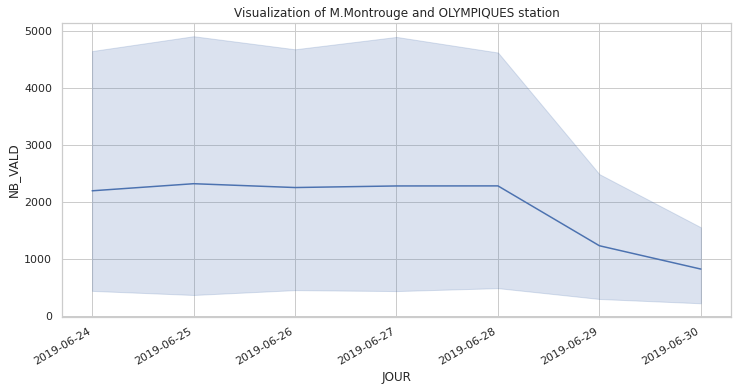

In [22]:
# Visualisation 

fig, axs = plt.subplots(1,1, figsize=(12, 6))

az = sns.lineplot(x='JOUR', y='NB_VALD', data=df_station)
az.set(xlabel='JOUR', ylabel='NB_VALD', title='Visualization of M.Montrouge and OLYMPIQUES station')


fig.autofmt_xdate()

In [23]:
# Puisque les dates se repètent, on regroupement par jour 
df_station = df_station.groupby('JOUR')['NB_VALD'].sum()

In [24]:
from datetime import datetime
df_station = pd.DataFrame(df_station)
df_station

,NB_VALD
JOUR,
2019-06-24,39402
2019-06-25,41642
2019-06-26,40433
2019-06-27,40932
2019-06-28,40952
2019-06-29,22059
2019-06-30,14694


Pour faire la prédiction, nous allons faire 

In [26]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_station['NB_VALD'])
     
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : 0.3409796815312265
p-value : 0.9791484387388519
Valeurs Critiques :
	1%: -5.354256481481482
	5%: -3.6462381481481483
	10%: -2.901197777777778


La statistique ADF est loin des valeurs critiques et la p-value est supérieure au seuil (0,05). On peut donc conclure que la série temporelle n’est pas stationnaire.

Prendre le logarithme de la variable dépendante est un moyen simple de réduire le taux d’augmentation de la moyenne mobile :

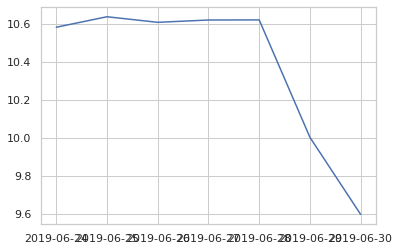

In [31]:
df_log = np.log(df_station)
plt.plot(df_log)

In [35]:
# J'ai choisi le modèle ARRIMA, pour faire la prédiction 
# La bibliothèque "statsmodels"

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(0,0,2))
results = model.fit(disp=-1)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


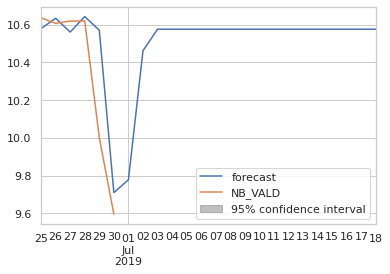

In [38]:
# Étant donné que nous disposons de données pour chaque jour remontant à 12 ans et que nous voulons prévoir 
# le nombre de validations pour les 30 prochaines jours, nous utilisons (12 x1)+ (30 x 1) = 42.

fig = results.plot_predict(1,42)